<a href="https://colab.research.google.com/github/ashen-pabasara/fabric-defect-detection/blob/main/model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuration**

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted successfully!")

Mounted at /content/drive
Google Drive mounted successfully!


In [3]:
# Install ultralytics
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.3 MB/s eta 0:00:00


In [4]:
# Folder path to zip file on Google Drive
zip_path = '/content/drive/My Drive/EEY9536 Data Science Project/Dataset/fabric_dataset.zip'

# Define unzip dir
unzip_destination = '/content/'

print(f"Starting to unzip {zip_path} to {unzip_destination}...")

# Run the unzip command
!unzip -q "{zip_path}" -d "{unzip_destination}"

print("Dataset unzipped successfully to /content/fabric_dataset/")

Starting to unzip /content/drive/My Drive/EEY9536 Data Science Project/Dataset/fabric_dataset.zip to /content/...
Dataset unzipped successfully to /content/fabric_dataset/


In [5]:
import yaml

# Define dataset path
correct_colab_path = '/content/fabric_dataset'

# Define the class names
class_names = { 0: "Defect" }

# reate the correct data dictionary
data_yaml = {
    'path': correct_colab_path,  # Use the correct Colab path
    'train': 'images/train',     # Relative path
    'val': 'images/val',         # Relative path
    'names': class_names
}

# Define the .yaml file path
yaml_file_path = '/content/fabric_dataset/fabric_data.yaml'

# Write YAML file
with open(yaml_file_path, 'w') as f:
    yaml.dump(data_yaml, f, sort_keys=False)

print(f"Successfully created a new, correct {yaml_file_path} with Linux paths.")
print("\n--- New YAML File Content ---")
print(yaml.dump(data_yaml, sort_keys=False))

Successfully created a new, correct /content/fabric_dataset/fabric_data.yaml with Linux paths.

--- New YAML File Content ---
path: /content/fabric_dataset
train: images/train
val: images/val
names:
  0: Defect



# **Model Training YOLOv8n**

In [ ]:
from ultralytics import YOLO

# Path to YAML file
yaml_path = '/content/fabric_dataset/fabric_data.yaml'

# Load the model
model = YOLO('yolov8n.pt')

# Start training
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=512,
    batch=64,
    name='yolov8n_colab_run_b64'
)

print("Training complete!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Starting training... This will be much faster now.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fabric_dataset/fabric_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015

# **Visualization**

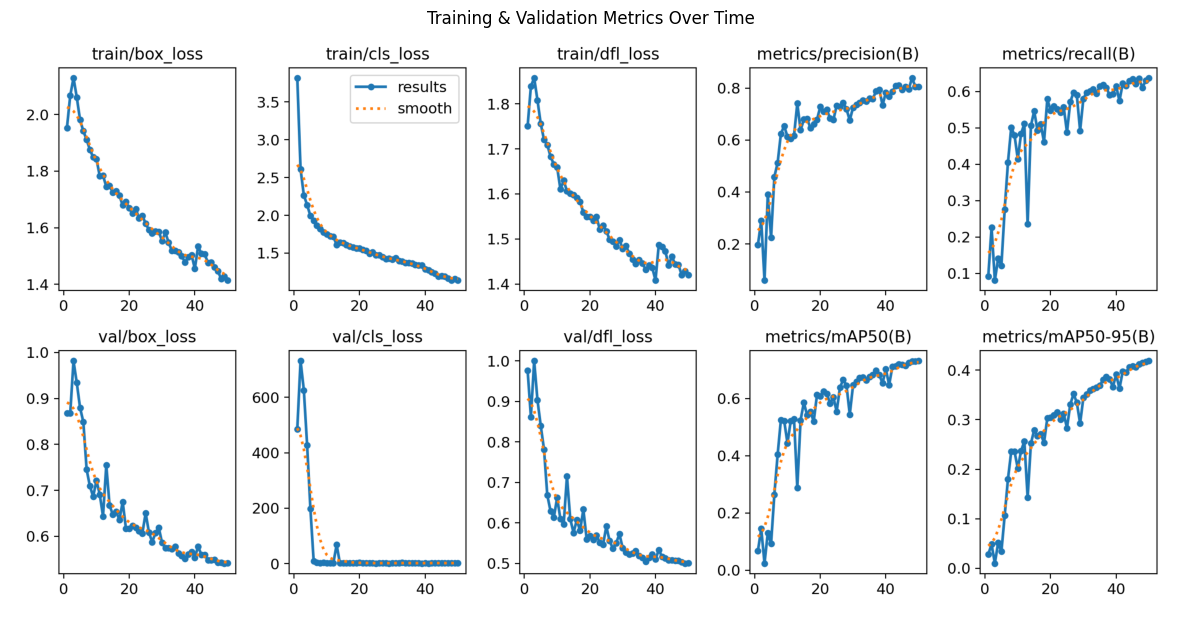

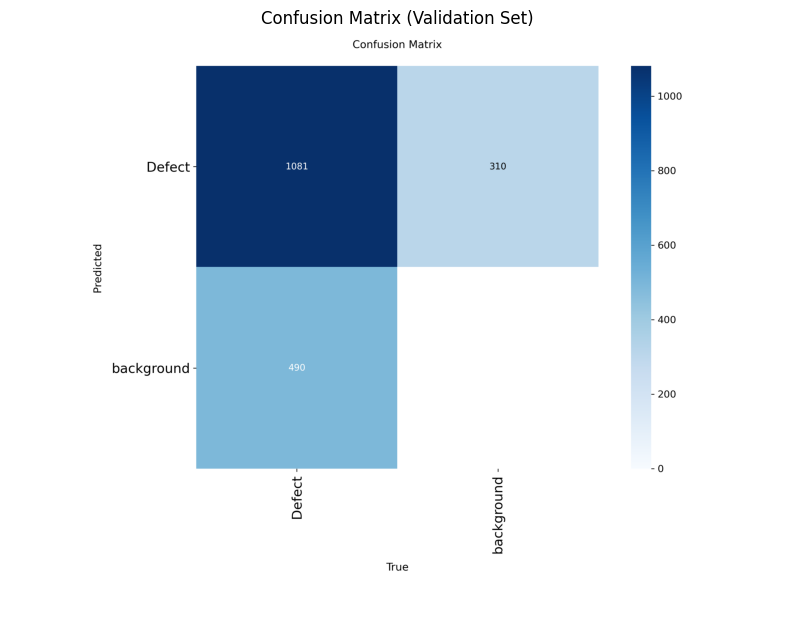

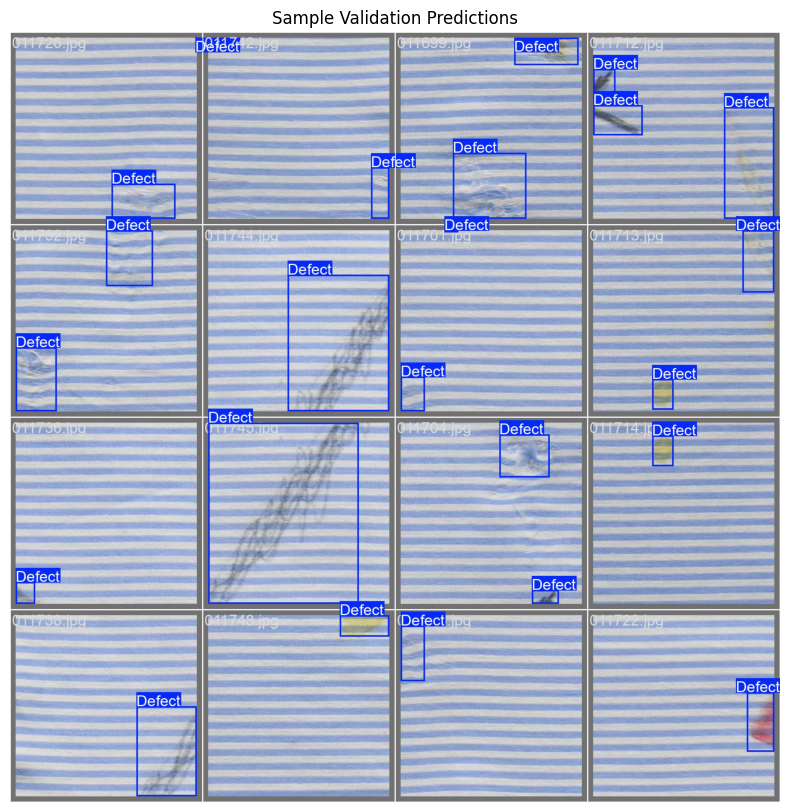

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Path to results folder
results_path = '/content/runs/detect/yolov8n_colab_run_b64/'

# Show "Train vs. Test" Graphs
img = cv2.imread(results_path + 'results.png')
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Training & Validation Metrics Over Time')
plt.axis('off')
plt.show()

# Show the Confusion Matrix
img_cm = cv2.imread(results_path + 'confusion_matrix.png')
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_cm, cv2.COLOR_BGR2RGB))
plt.title('Confusion Matrix (Validation Set)')
plt.axis('off')
plt.show()

# Show a batch of Validation Results
img_val = cv2.imread(results_path + 'val_batch0_labels.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_val, cv2.COLOR_BGR2RGB))
plt.title('Sample Validation Predictions')
plt.axis('off')
plt.show()

In [ ]:
# Make sure the destination folder exists
!mkdir -p "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results/"

# Copy to drive
!cp -r /content/runs/detect/yolov8n_colab_run_b64 "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results/"

print("Copy complete!")

Copy complete! Your results are now saved in Google Drive.


# **Model Training YOLOv11n**

In [6]:
from ultralytics import YOLO

# Path to YAML file
yaml_path = '/content/fabric_dataset/fabric_data.yaml'

# Load the model
model = YOLO('yolo11n.pt')

# Start training
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=512,
    batch=64,
    name='yolov11n_colab_run_b64'
)

print("Training complete!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fabric_dataset/fabric_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=

In [1]:
# Make sure the destination folder exists
!mkdir -p "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results/"

# Copy to drive
!cp -r /content/runs/detect/yolov8n_colab_run_b64 "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results/"

print("Copy complete!")

cp: cannot stat '/content/runs/detect/yolov8n_colab_run_b64': No such file or directory
Copy complete!
